In [ ]:
# @title import libraries
# Importing NumPy library for numerical operations
import numpy as np
# Importing Pandas library for data manipulation and analysis
import pandas as pd
from scipy.stats import linregress
#importing visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt


# Importing warnings module to handle warnings
import warnings
# Filtering out warnings to ignore them
warnings.filterwarnings("ignore")


#set  plot style
plt.style.use('Solarize_Light2')

In [ ]:
df_nba = pd.read_excel("/content/drive/MyDrive/projects/nba_win_3p.xlsx")
df_premier=pd.read_excel("/content/drive/MyDrive/projects/premier.xlsx")

In [ ]:
print(df_nba.head())
df_nba.describe()

                Team   Season  Win %   3P %
0      Atlanta Hawks  2021-22  0.524  0.374
1    Boston Celtics   2021-22  0.622  0.356
2      Brooklyn Nets  2021-22  0.537  0.361
3  Charlotte Hornets  2021-22  0.524  0.365
4      Chicago Bulls  2021-22  0.561  0.369


,Win %,3P %
count,93.000000,93.000000
mean,0.499968,0.359796
std,0.139344,0.015044
min,0.171000,0.323000
25%,0.415000,0.349000
50%,0.524000,0.360000
75%,0.598000,0.369000
max,0.780000,0.389000


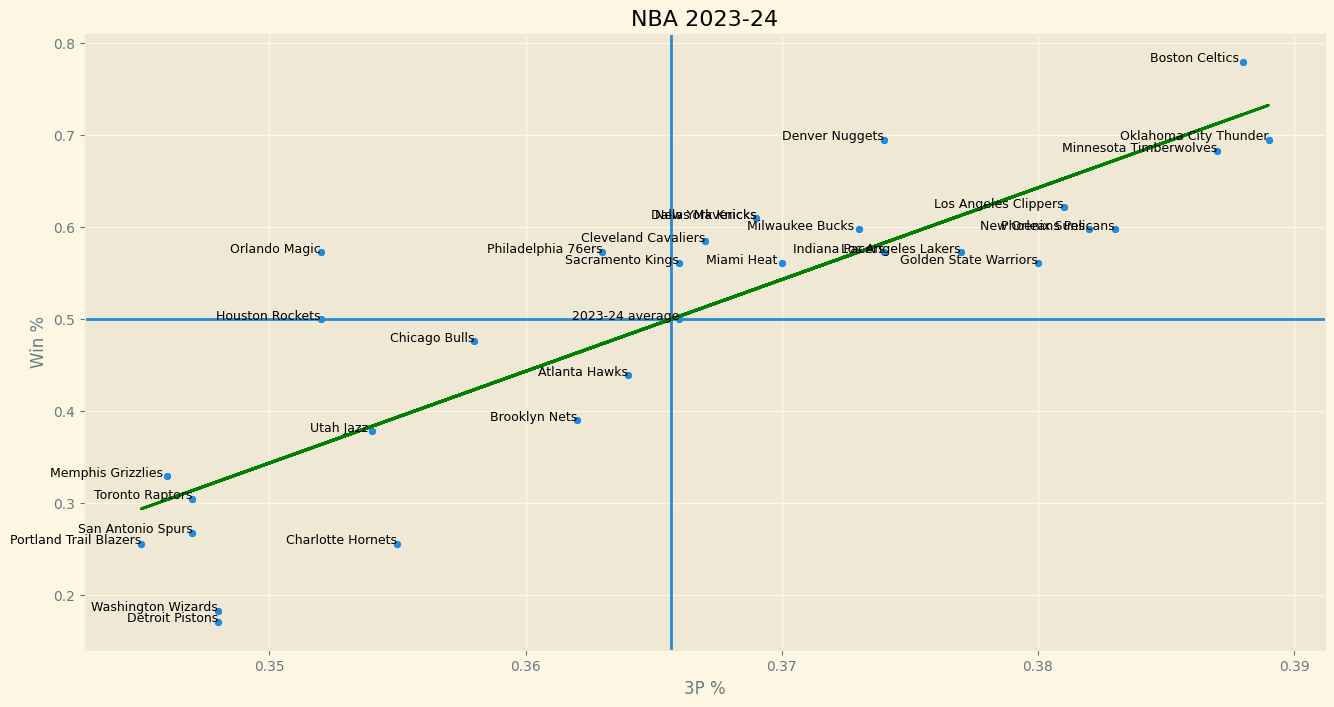

          3P %    Win %
3P %   1.00000  0.85601
Win %  0.85601  1.00000


<Figure size 640x480 with 0 Axes>

In [ ]:
#plot the scatterplot for 3p and win percentage for 2023-24 nba season
plt.figure(figsize=(16,8))
season = df_nba[df_nba["Season"]=="2023-24"]
p1 = sns.scatterplot(data=season,x="3P %",y="Win %")
plt.title(f"NBA 2023-24")
plt.axhline(y=0.5)
plt.axvline(x=season["3P %"].mean())

#calculate the regression line for 3p and win percentage
x1=season["3P %"]
y1=season["Win %"]
slope, intercept, r_value, p_value, std_err = linregress(x1, y1)
regression_line = slope * x1 + intercept

# Plot the regression line
plt.plot(x1, regression_line, color='green', label=f'y={slope:.2f}x+{intercept:.2f}')


#annotation on the dots
for i in range(season.shape[0]):
      plt.text(season["3P %"].iloc[i], season["Win %"].iloc[i], season["Team"].iloc[i],
               fontsize=9, ha='right')

plt.show()
plt.tight_layout()
print(season[['3P %',"Win %"]].corr())

In [ ]:
df_premier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Team             20 non-null     object 
 1   SEASON           20 non-null     object 
 2   G                20 non-null     int64  
 3   GA               20 non-null     int64  
 4   PTS              20 non-null     int64  
 5   TOTAL SHOTS      20 non-null     int64  
 6   SHOTS ON TARGET  20 non-null     int64  
 7   SHOT ACC         20 non-null     float64
dtypes: float64(1), int64(5), object(2)
memory usage: 1.4+ KB


In [ ]:
df_premier["GD"] = df_premier["G"] - df_premier["GA"]

In [ ]:
for x in df_premier["SEASON"].unique():
  print(x)
  print(df_premier[df_premier["SEASON"]==x][["PTS",'G',"GA","GD","TOTAL SHOTS","SHOTS ON TARGET","SHOT ACC"]].corr()["PTS"])
  print('')

2023-24
PTS                1.000000
G                  0.907639
GA                -0.886613
GD                 0.968102
TOTAL SHOTS        0.877677
SHOTS ON TARGET    0.901486
SHOT ACC           0.487276
Name: PTS, dtype: float64



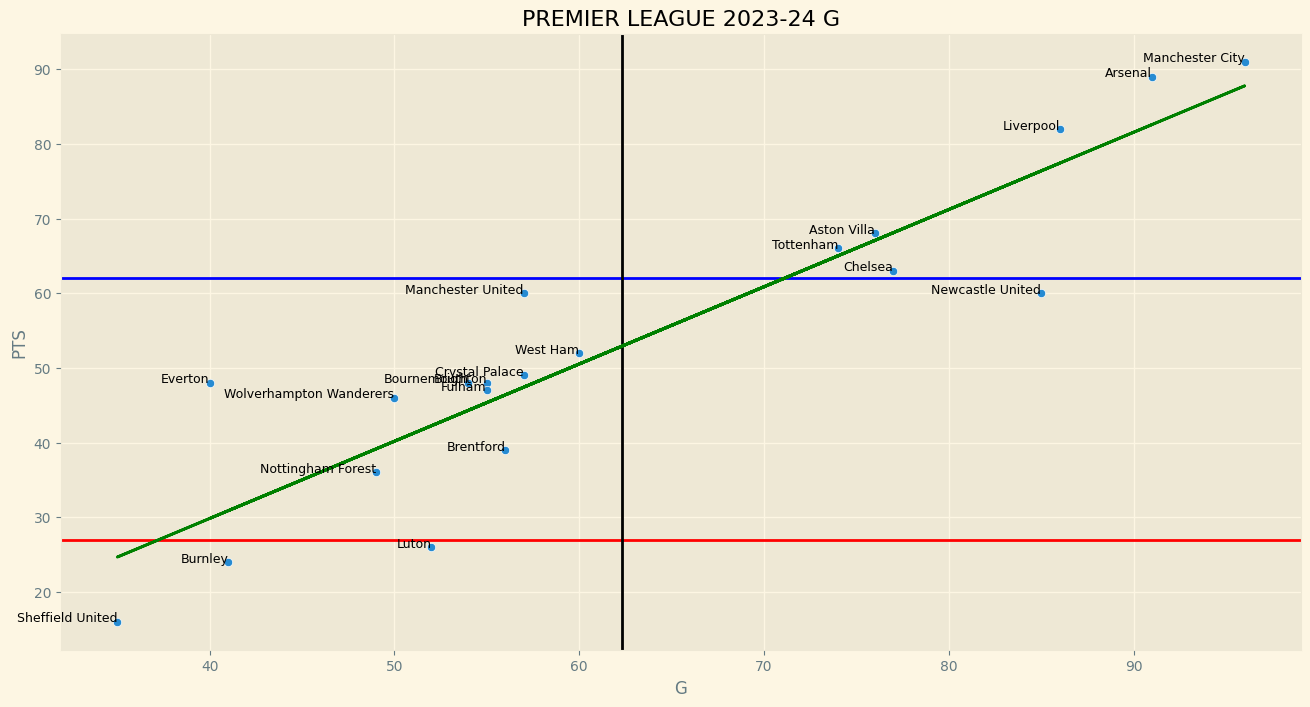

<Figure size 640x480 with 0 Axes>

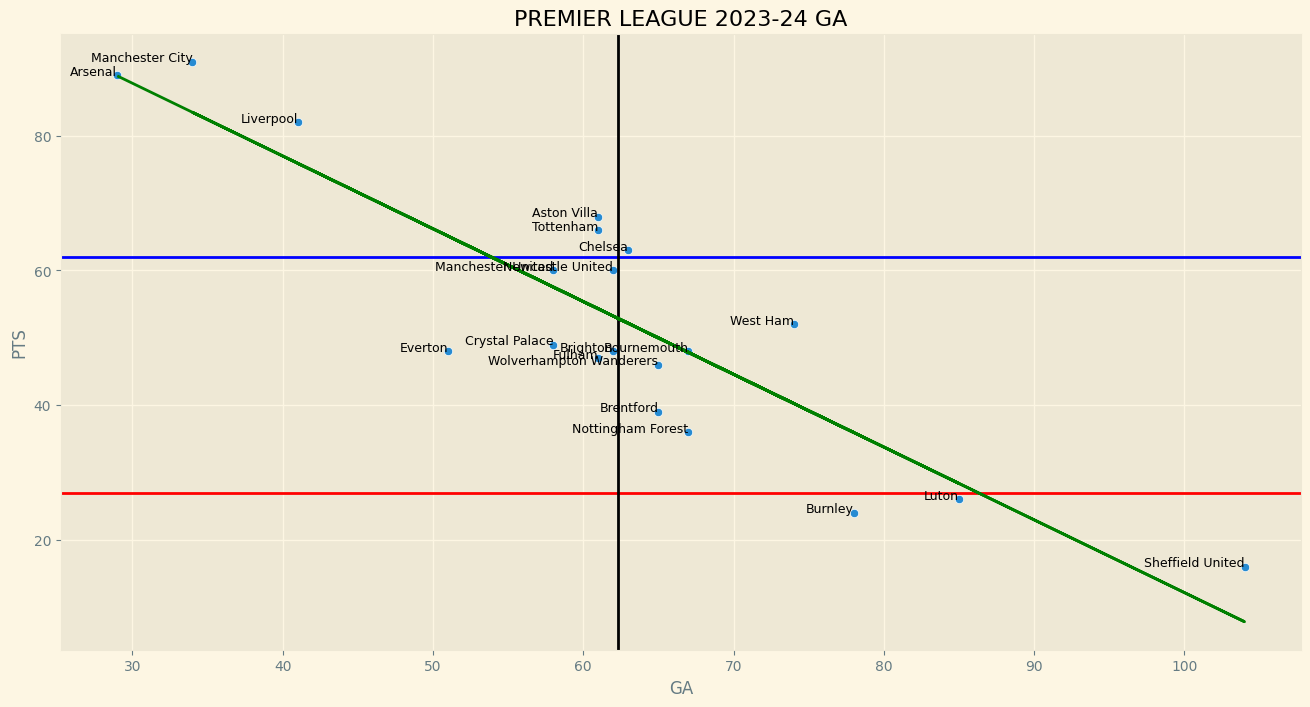

<Figure size 640x480 with 0 Axes>

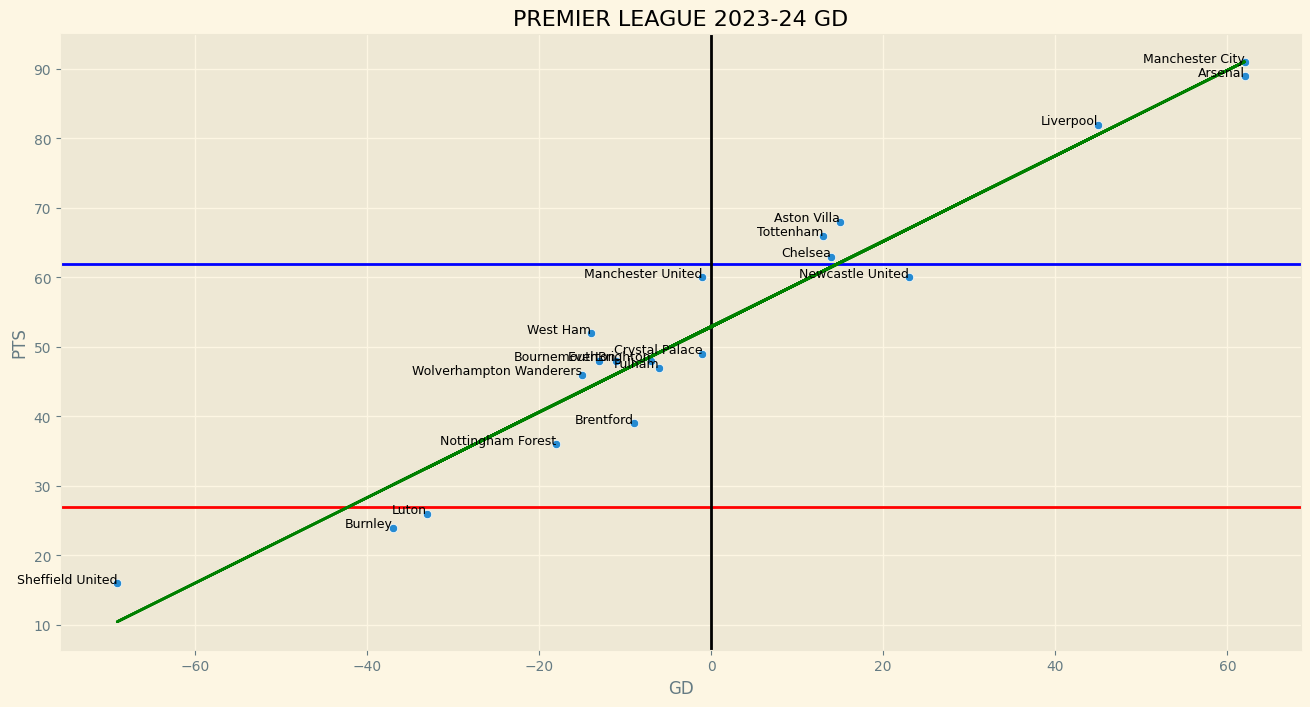

<Figure size 640x480 with 0 Axes>

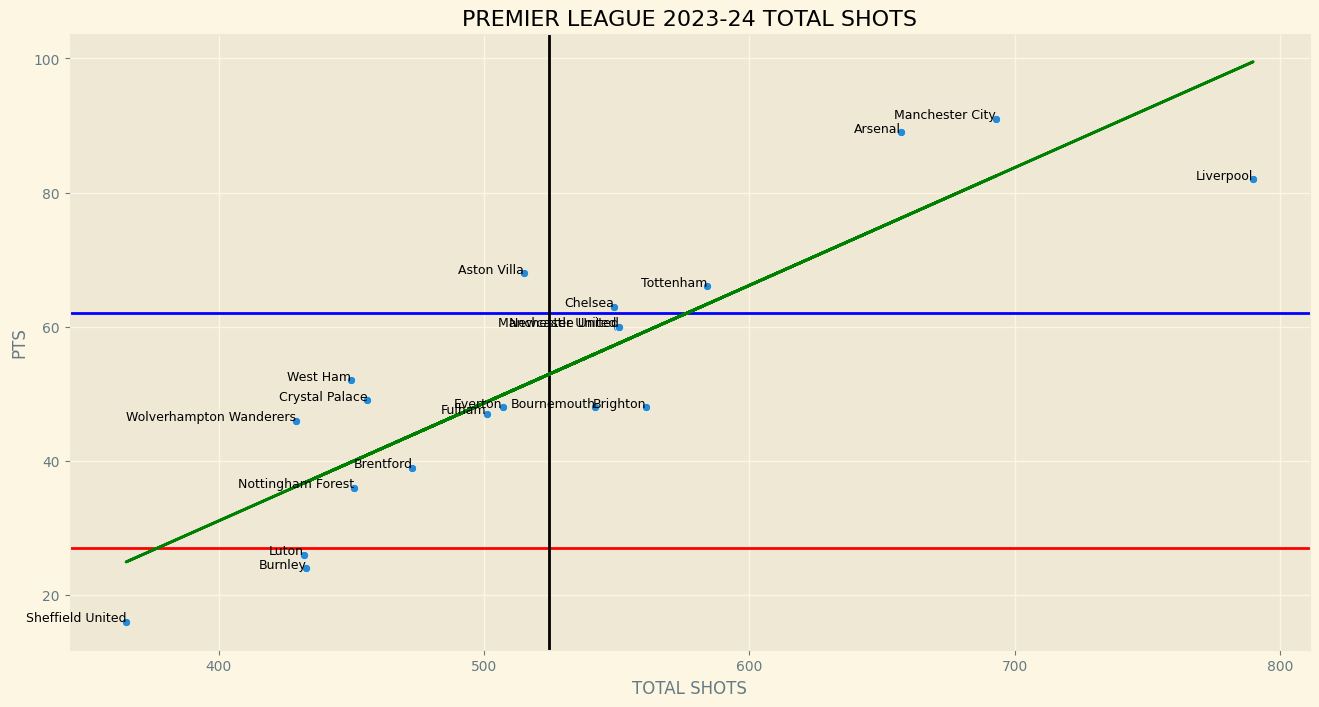

<Figure size 640x480 with 0 Axes>

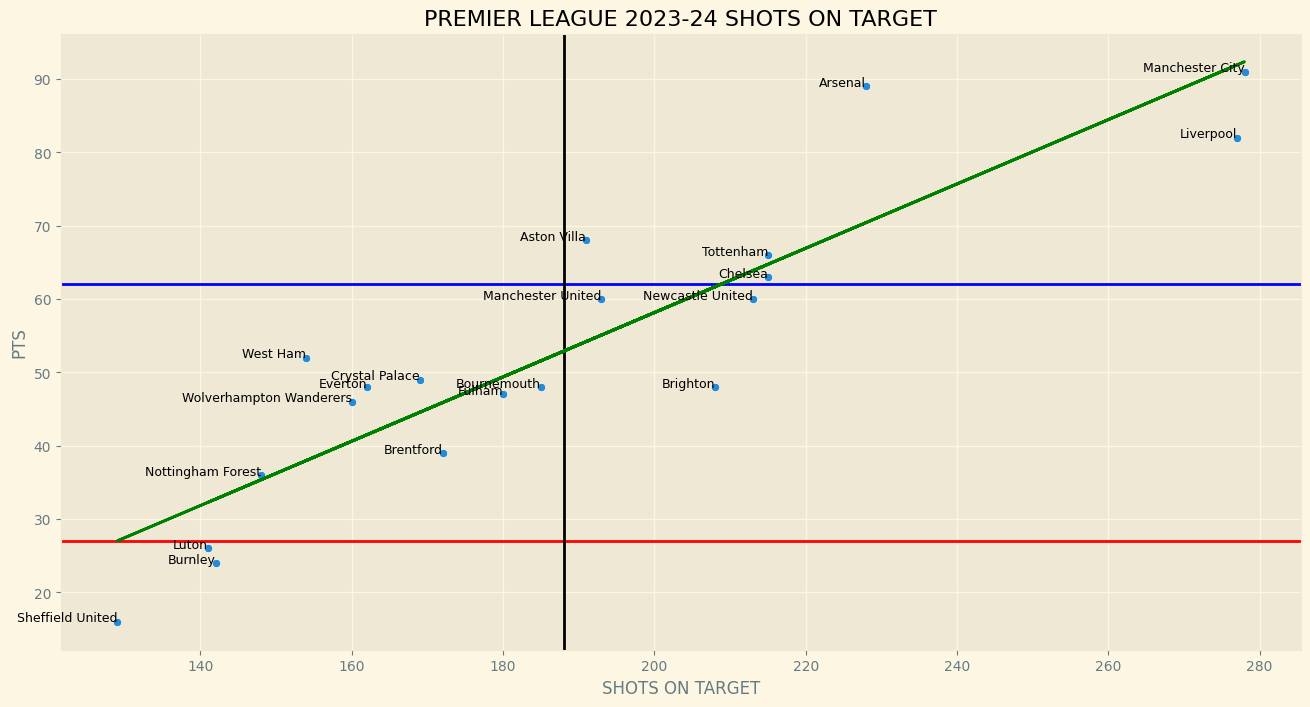

<Figure size 640x480 with 0 Axes>

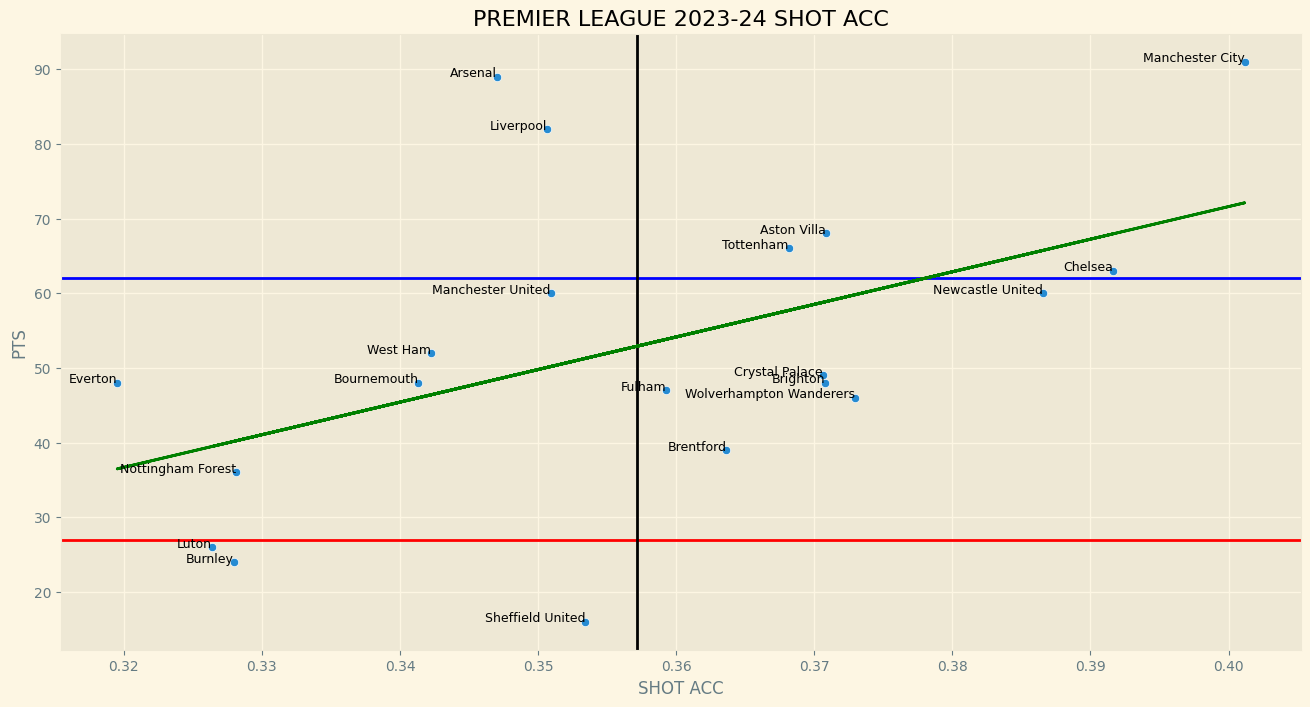

<Figure size 640x480 with 0 Axes>

In [ ]:
#building six plots, like in the nba file, for every statistic against points gained

col=["G","GA","GD","TOTAL SHOTS","SHOTS ON TARGET","SHOT ACC"]

for col in col:
  plt.figure(figsize=(16,8))
  p1 = sns.scatterplot(data=df_premier,x=col,y="PTS")
  plt.title(f"PREMIER LEAGUE 2023-24 {col}")


  #lmplot



  for i in range(df_premier.shape[0]):
        plt.text(df_premier[col].iloc[i], df_premier["PTS"].iloc[i], df_premier["Team"].iloc[i],
               fontsize=9, ha='right')

  plt.axhline(y=27,color="red") #the points where team below get relegated
  plt.axhline(y=62,color="blue") #the points where teams over it get european ticket
  plt.axvline(x=df_premier[col].mean(),color="black")



  x1=df_premier[col]
  y1=df_premier["PTS"]
  slope, intercept, r_value, p_value, std_err = linregress(x1, y1)
  regression_line = slope * x1 + intercept

# Plot the regression line
  plt.plot(x1, regression_line, color='green', label=f'y={slope:.2f}x+{intercept:.2f}')




  plt.show()
  plt.tight_layout()

# **Analysis Report: Correlation of Key Stats with Team Performance in the Premier League**


**Introduction**
Recently, I came across a tweet highlighting the correlation between winning percentage and three-point (3P) shooting percentage in the last NBA season. The teams with the highest 3P percentages also had the highest win percentages, and no team with an above-league-average 3P percentage had a win percentage below 50%. This observation led me to wonder: is there a similar correlation in football, particularly in the Premier League?

To investigate, I collected data on several performance metrics: G**oals Scored (G), Goals Against (GA), Goal Difference (GD), Total Shots, Shots on Target, and Shot Accuracy**. In the visualizations:

**Red line** indicates the relegation cut-off.

**Blue line** represents the European competition qualification threshold.

**Green line** is the regression line for statistical trend analysis.

**Black line** marks the league average.

# **Findings**

***Goals Scored (G)***

Teams that scored more goals generally finished higher in the league standings. This trend is expected in a low-scoring sport like football, where each goal has a significant impact on points and positioning.

***Goals Against (GA)***

While strong defense is beneficial, it's not a guaranteed determinant of a higher league finish. For instance, Everton had the fourth-best defense but only managed a 15th-place finish. However, poor defense is more likely to lead to relegation, as evidenced by the three relegated teams, each having one of the league’s worst defenses.

***Goal Difference (GD)***

Goal difference strongly correlates with success; six of the seven teams with the best GD qualified for European competition. Similarly, the three teams with the worst GD were relegated.

***Total Shots/Shots on Target***

Teams with the fewest shots generally ended up in relegation positions, while the top three teams in shots attempted also occupied the highest league spots. This suggests a correlation between shot volume and success. The same can be said for shots on target.

***Shot Accuracy***

Shot accuracy showed some unexpected patterns. Arsenal and Liverpool, for example, finished second and third, respectively, despite being below the league average in shot accuracy. Meanwhile, Manchester City’s first-place shot accuracy aligned with their league victory. However, not all cases supported this correlation; Wolves had the fourth-best shot accuracy but only finished 14th.

# **Conclusions**

***For Goals:*** Scoring more goals correlates strongly with a higher league finish. Likewise, conceding fewer goals is essential to avoid relegation.

***For Shots:*** Higher shot volumes appear beneficial, while shot accuracy alone doesn’t always predict better standings. Teams should focus on taking a high number of on-target shots from optimal positions on the field, as creating quality chances can be more valuable than solely improving shot accuracy.

